# 🟦 LogisticRegression

- 회귀(Regression) 라는 이름이 붙었지만, 실제로는 분류(Classification) 모델
- 어떤 입력 벡터 x가 주어졌을 때, 해당 입력이 특정 클래스에 속할 **확률을 예측**합니다.

- 이진분류의 경우 확률값이 0.5 이상이명 양성클래스 1,  아니면 음성클래스 0 으로 분류

In [ ]:
# 학습 목표:
#   당뇨병 데이터
#   csv => np 로드
#   손실, 정확도 시각화
#   모델 parameter 확인
#   BinaryCrossEntropy (BCELoss)
#   SGD
#   batch, overfit
#   validation, test


# 데이터 셋 : 당뇨병 데이터

# import

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn

In [2]:
base_path = r'/content/drive/MyDrive/KoreaIT (코리아it)/250715 💚자연어처리S4/[자연어처리]/dataset(NLP2507)'

# 데이터 준비

## 데이터셋 소개

In [3]:
df = pd.read_csv(os.path.join(base_path, 'diabetes.csv'), header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       759 non-null    float64
 1   1       759 non-null    float64
 2   2       759 non-null    float64
 3   3       759 non-null    float64
 4   4       759 non-null    float64
 5   5       759 non-null    float64
 6   6       759 non-null    float64
 7   7       759 non-null    float64
 8   8       759 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 53.5 KB


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,-0.407657,0.218563,0.176505,-0.289735,-0.323534,-0.032245,-0.663253,-0.516162,0.653491
std,0.386260,0.306419,0.201287,0.258480,0.375544,0.205376,0.283056,0.400794,0.476171
min,-0.882353,-0.557789,-0.606557,-0.858586,-0.966903,-0.457526,-0.994876,-0.966667,0.000000
25%,-0.764706,-0.005025,0.016393,-0.494949,-0.716312,-0.178837,-0.858241,-0.866667,0.000000
50%,-0.529412,0.165829,0.180328,-0.292929,0.000000,-0.034277,-0.747225,-0.633333,1.000000
75%,0.000000,0.407035,0.311475,0.000000,0.000000,0.087929,-0.531597,-0.233333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# 일반적으로 알려진 diabetes.csv 파일 ()
#   정규화(normalization/표준화)된 버전

# 원본출처: Pima Indians Diabetes Dataset
#   https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

# 입력 특성: 8개 + 타겟값 1
#   임신 횟수 (Pregnancies)
#   혈당 수치 (Glucose)
#   혈압 (Blood Pressure)
#   피부 두께 (Skin Thickness)
#   인슐린 (Insulin)
#   체질량지수 (BMI)
#   당뇨병 관련 함수 (Diabetes Pedigree Function)
#   나이 (Age)
#   0 또는 1	타깃 (당뇨병 여부: 1=양성, 0=음성)

# 모든 피처가 [-1, 1] 근처 범위로 정규화되어 있음.
# 타깃(Target)은 0 또는 1의 이진값.


## 데이터 읽어오기

In [6]:
loaded_data = np.loadtxt(os.path.join(base_path, 'diabetes.csv'), delimiter=',')
loaded_data.shape

(759, 9)

In [7]:
loaded_data[:5]

array([[-0.294118  ,  0.487437  ,  0.180328  , -0.292929  ,  0.        ,
         0.00149028, -0.53117   , -0.0333333 ,  0.        ],
       [-0.882353  , -0.145729  ,  0.0819672 , -0.414141  ,  0.        ,
        -0.207153  , -0.766866  , -0.666667  ,  1.        ],
       [-0.0588235 ,  0.839196  ,  0.0491803 ,  0.        ,  0.        ,
        -0.305514  , -0.492741  , -0.633333  ,  0.        ],
       [-0.882353  , -0.105528  ,  0.0819672 , -0.535354  , -0.777778  ,
        -0.162444  , -0.923997  ,  0.        ,  1.        ],
       [ 0.        ,  0.376884  , -0.344262  , -0.292929  , -0.602837  ,
         0.28465   ,  0.887276  , -0.6       ,  0.        ]])

In [8]:
x_train_np = loaded_data[:, 0:-1]  # 입력데이터 (8개 특성)
y_train_np = loaded_data[:, [-1]]  # 타깃 (0: 음성, 1: 양성)


print('loaded_data.shape = ', loaded_data.shape)
print('x_train_np.shape = ', x_train_np.shape)
print('y_train_np.shape = ', y_train_np.shape)

loaded_data.shape =  (759, 9)
x_train_np.shape =  (759, 8)
y_train_np.shape =  (759, 1)


In [9]:
x_train = torch.Tensor(x_train_np)
y_train = torch.Tensor(y_train_np)

print(x_train.shape)
print(y_train.shape)

torch.Size([759, 8])
torch.Size([759, 1])


# 모델 정의

In [10]:
# 로지스틱회귀모델을 PyTorch 구현

class MyLogisticRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.logistic_stack = nn.Sequential(
        nn.Linear(8, 1),   # 입력 8개, -> 출력 1개
        nn.Sigmoid()      # 출력 확률값 (0.0 ~ 1.0)  이진분류용 활성화 함수
    )

  def forward(self, data):
    prediction = self.logistic_stack(data)
    return prediction



In [11]:
model = MyLogisticRegressionModel()

In [12]:
# 모델 parameter 확인
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[ 0.1683, -0.2187, -0.3144, -0.2323, -0.0924, -0.1057,  0.0691, -0.1909]],
       requires_grad=True)
Parameter containing:
tensor([-0.0792], requires_grad=True)


# 손실 함수 및 옵티마이저

In [13]:
# Binary Cross Entropy Loss (이진분류 손실 함수)
loss_function = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# 학습

In [14]:
# loss 값, accuracy 값도 저장 -> 시각화
train_loss_list = []
train_accuracy_list = []


num_epoch = 5000

for epoch in range(num_epoch+1):

  outputs = model(x_train)
  loss = loss_function(outputs, y_train)

  train_loss_list.append(loss.item())

  # 정확도 구하는 코드. sigmoid 특성상
  # 예측 > 0.5 이면 True 아니면 False 이므로
  # True 일때는 1.0,  False 일때는 0.0 으로 타입캐스팅하여
  # 정답 y_train 과 비교함.
  prediction = outputs > 0.5
  correct = (prediction.float() == y_train)
  accuracy = correct.sum().item() / len(correct)

  train_accuracy_list.append(accuracy)

  optimizer.zero_grad() # 기울기 초기화
  loss.backward()  # 역전파 (gradient 계산)
  optimizer.step() # 가중치 업데이트

  if epoch % 100 == 0:
      print('epoch = ', epoch, ' current loss = ', loss.item(), ' accuracy = ', accuracy)







epoch =  0  current loss =  0.6858823895454407  accuracy =  0.5507246376811594
epoch =  100  current loss =  0.5625543594360352  accuracy =  0.6903820816864296
epoch =  200  current loss =  0.5344982147216797  accuracy =  0.7285902503293807
epoch =  300  current loss =  0.5170738697052002  accuracy =  0.7602108036890646
epoch =  400  current loss =  0.5056167840957642  accuracy =  0.769433465085639
epoch =  500  current loss =  0.4977377653121948  accuracy =  0.7720685111989459
epoch =  600  current loss =  0.4921266734600067  accuracy =  0.7720685111989459
epoch =  700  current loss =  0.48801836371421814  accuracy =  0.766798418972332
epoch =  800  current loss =  0.4849418103694916  accuracy =  0.7654808959156785
epoch =  900  current loss =  0.48259371519088745  accuracy =  0.7654808959156785
epoch =  1000  current loss =  0.48077234625816345  accuracy =  0.766798418972332
epoch =  1100  current loss =  0.479339063167572  accuracy =  0.766798418972332
epoch =  1200  current loss = 

# 학습후 파라미터 출력

In [15]:
for name, child in model.named_children():

  print('🟨', name)
  for param in child.parameters():
    print(param)

🟨 logistic_stack
Parameter containing:
tensor([[-0.8933, -3.5648,  0.2845, -0.5812, -0.3272, -2.4588, -0.9954, -0.0825]],
       requires_grad=True)
Parameter containing:
tensor([0.1663], requires_grad=True)


In [16]:
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[-0.8933, -3.5648,  0.2845, -0.5812, -0.3272, -2.4588, -0.9954, -0.0825]],
       requires_grad=True)
Parameter containing:
tensor([0.1663], requires_grad=True)


# 손실 및 정확도 추세

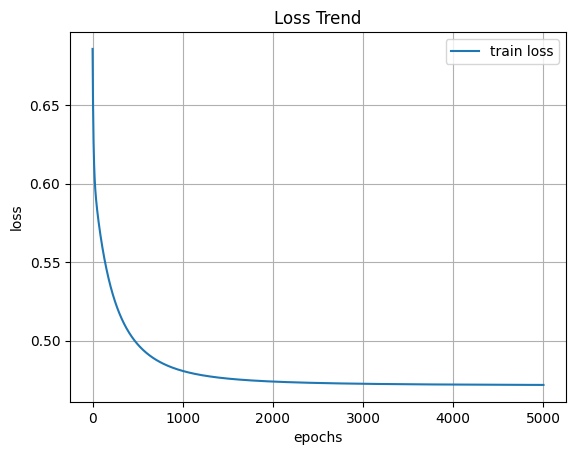

In [17]:
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(train_loss_list, label='train loss')
plt.legend(loc='best')

plt.show()



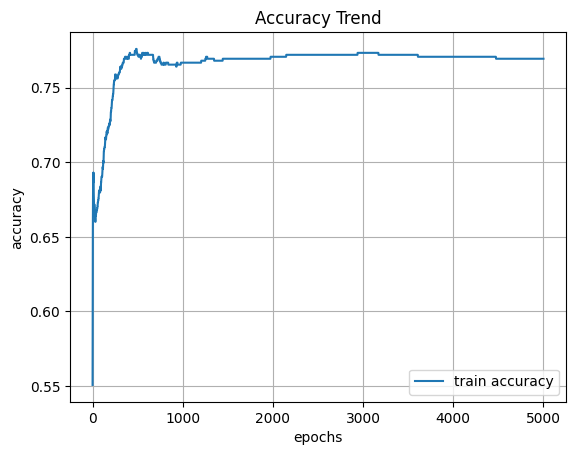

In [18]:
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(train_accuracy_list, label='train accuracy')
plt.legend(loc='best')

plt.show()

## 고려사항 - 데이터. 배치(batch). 오버핏(overfit)


**현재는 오직 train data에 대한 손실과 정확도임**

* 즉 ① 학습 중에 머신러닝과 딥러닝 시스템이 train data에만 최적화되는 오버피팅(overfitting)을 확인할 수 있는 **validation data** 와 ② 학습을 마친 후에 train data가 아닌 임의의 데이터로 시스템 성능을 검증할 수 있는 **test data** 반드시 필요함

---

**배치 사이즈(batch size) 설정 필요**

* 지금은 학습을 위해 전체 데이터 (759x8)를 모두 시스템에 입력으로 주고 계산을 하였지만, 이러면 계산 속도와 정확도 등의 시스템 성능이 떨어지기 때문에, 한번에 입력으로 들어가는 데이터 크기인 **배치 사이즈(batch size) 설정**이 반드시 필요함

# 🟦 심층신경망 (DNN)
- Deep Neural Network
- aka. 딥러닝

# 데이터 준비

In [19]:
# x_train: 10개의 입력값 (특징이 1차원)
# y_train: 이진 레이블 (0 또는 1)
# 입력값이 12이하이면  0, 14 이상이면 1이 되도록 학습하는 간단한 이진 분류 문제.

x_train = torch.Tensor([2, 4, 6, 8, 10,
                        12, 14, 16, 18, 20]).view(10,1)
y_train = torch.Tensor([0, 0, 0, 0, 0,
                        0, 1, 1, 1, 1]).view(10,1)

print(x_train.shape, y_train.shape)

torch.Size([10, 1]) torch.Size([10, 1])


# 모델구축

In [20]:
class MyDeepLearningModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.deeplearning_stack = nn.Sequential(
        nn.Linear(1, 8),  # 입력1개, 출력 8개
        nn.Linear(8, 1),  # 입력8개, 출력 1개
        nn.Sigmoid(),     # 출력을 (0, 1) 범위 -> 이진분류
    )

  def forward(self, data):
    return self.deeplearning_stack(data)

In [ ]:
# 은닉층의 뉴런의 개수는? <- 경험과 실험을 통해 알아 나가야 됨.
# 출력층의 뉴런개수보다는 많아야 함!!

In [ ]:
# 인공신경망에서는 '교차검증' 을 잘 사용하지 않고 검증 세트를 별도로 덜어내어 사용하곤 함.
#    - 이유1 :  딥러닝 분야의 데이터셋은 이미 충분히 크다.  (검증 점수가 안정적)
#    - 이유2 :  교차검증 수행하기에 훈련시간이 너무 오래 걸린다.

In [21]:
model = MyDeepLearningModel()

In [22]:
# 모델 parameter 들 확인
for name, child in model.named_children():
  print('🟨', name)

  for param_name, param in child.named_parameters():
    print(' ', param_name, '\n ', param)

🟨 deeplearning_stack
  0.weight 
  Parameter containing:
tensor([[-0.2138],
        [-0.1404],
        [-0.7127],
        [ 0.1719],
        [-0.6296],
        [-0.5740],
        [ 0.1151],
        [ 0.8866]], requires_grad=True)
  0.bias 
  Parameter containing:
tensor([-0.9861,  0.9647, -0.8994,  0.5846, -0.1736,  0.5924,  0.6137, -0.5289],
       requires_grad=True)
  1.weight 
  Parameter containing:
tensor([[ 0.1919,  0.0509, -0.1778, -0.2944,  0.0988, -0.2819,  0.2502, -0.3488]],
       requires_grad=True)
  1.bias 
  Parameter containing:
tensor([0.3070], requires_grad=True)


In [ ]:
"""
모델의 학습 가능한 가중치(weights)와 편향(bias) 출력
결과를 하나씩 뜯어보면,
모델 구조(Linear(1→8) → Linear(8→1) → Sigmoid)에 맞게
4개의 Parameter가 생성

nn.Linear(in_features, out_features)의 파라미터는
  가중치(weight): (out_features, in_features) 크기의 행렬
  편향(bias): (out_features,) 크기의 벡터
즉,
Linear(1, 8) → weight: (8,1), bias: (8,)
Linear(8, 1) → weight: (1,8), bias: (1,)


deeplearning_stack
  0.weight
  Parameter containing:
tensor([[-0.2138],
        [-0.1404],
        [-0.7127],
        [ 0.1719],
        [-0.6296],
        [-0.5740],
        [ 0.1151],
        [ 0.8866]], requires_grad=True)
  0.bias
  Parameter containing:
tensor([-0.9861,  0.9647, -0.8994,  0.5846, -0.1736,  0.5924,  0.6137, -0.5289],
       requires_grad=True)
  1.weight
  Parameter containing:
tensor([[ 0.1919,  0.0509, -0.1778, -0.2944,  0.0988, -0.2819,  0.2502, -0.3488]],
       requires_grad=True)
  1.bias
  Parameter containing:
tensor([0.3070], requires_grad=True)
"""
None

# 손실함수, 옵티마이저

In [23]:
loss_function = nn.BCELoss() #  이진 분류에서 예측 확률과 실제 라벨의 차이를 측정.
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)


# train mode vs. eval mode

* **훈련 모드 (`model.train()`)**

  * 역전파 수행 가능.
  * Dropout → 무작위 뉴런 비활성화.
  * BatchNorm → 배치 통계(평균/분산) 사용.
  * 파라미터 업데이트 수행.

* **평가 모드 (`model.eval()`)**

  * 추론 모드 라고도 함
  * Dropout → 꺼짐 (모든 뉴런 사용).
  * BatchNorm → 러닝 평균/분산 사용 (학습 시 기록된 값).
  * 파라미터 고정, 역전파 수행하지 않음 (보통 `torch.no_grad()`와 함께 사용).

# 훈련 (train mode)

In [25]:
# 모델은 기본적으로 train() 모드 상태임.

num_epoch = 5000

# 모델은 기본적으로 train() 모드 상태임.
# ※만약 dropout, batchnorm 같은 계층이 포함되었다면
# 학습(훈련) 시 동작 방식이 다르므로 model.train()을 명시하는 것이 좋음.
model.train()

for epoch in range(num_epoch):
  outputs = model(x_train)  # 순전파
  loss = loss_function(outputs, y_train)  # 손실계산
  optimizer.zero_grad()
  loss.backward()  # 역전파
  optimizer.step()  # 가중치 업데이트

  if epoch % 100 == 0:
      print('epoch = ', epoch, ' current loss = ', loss.item())



epoch =  0  current loss =  0.01591685228049755
epoch =  100  current loss =  0.014582999050617218
epoch =  200  current loss =  0.01344094704836607
epoch =  300  current loss =  0.012452682480216026
epoch =  400  current loss =  0.01158964354544878
epoch =  500  current loss =  0.010829892940819263
epoch =  600  current loss =  0.010156354866921902
epoch =  700  current loss =  0.009555489756166935
epoch =  800  current loss =  0.009016426280140877
epoch =  900  current loss =  0.008530301973223686
epoch =  1000  current loss =  0.008089945651590824
epoch =  1100  current loss =  0.007689331658184528
epoch =  1200  current loss =  0.007323441095650196
epoch =  1300  current loss =  0.006988109555095434
epoch =  1400  current loss =  0.006679755635559559
epoch =  1500  current loss =  0.006395337171852589
epoch =  1600  current loss =  0.006132280454039574
epoch =  1700  current loss =  0.005888320505619049
epoch =  1800  current loss =  0.005661497358232737
epoch =  1900  current loss

# 예측 (eval mode)
- test data 이용

In [ ]:
# model.eval() → 모델을 평가 모드로 전환.
#   Dropout: 비활성화.
#   BatchNorm: 러닝 평균/분산 고정.

In [26]:
model.eval()

# test 데이터
test_data = torch.Tensor([0.5, 3.0, 3.5, 11.0, 13.0, 31.0]).view(6,1)

pred = model(test_data)
# ↑ 확률값 (0.0 ~ 1.0)  Sigmoid 함수 출력값

logical_value = (pred > 0.5).float()

print(pred)
print(logical_value)



tensor([[1.2007e-24],
        [7.4181e-20],
        [6.7371e-19],
        [1.5886e-04],
        [5.1943e-01],
        [1.0000e+00]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.]])


In [ ]:
"""
tensor([[1.2007e-24], <- 입력데이터 0.5 에 대한 예측값
        [7.4181e-20], <-           0.3 ..
        [6.7371e-19],
        [1.5886e-04],
        [5.1943e-01], <-           13 ...
        [1.0000e+00]], grad_fn=<SigmoidBackward0>)    <-  31에 대한 예측값
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],  <- 입력데이터 13에 대해서는 약 52% 확률로 1예측
        [1.]]) <- 입력데이터 31에 대해서는 100% 확률로 1예측.
"""
None

# 활성화함수 (activation function)

In [ ]:
# 활성화 함수 (activation function)
#  : 선형방정식 계산결과에 적용되는 함수

#  출력층에 적용되는 활성화 함수는 제한적
#       이진분류 -> 시그모이드 함수,  다중분류는 -> 소프트 맥스   ★(분류모델에서 쓰는 활성화 함수)

#  반면, 은닉층에 적용되는 활성화 함수는 다양하다!
#       sigmoid, ReLu, Tanh...

In [ ]:
# 참고] 회귀모델에 출력층에 사용하는 활성화 함수? => '필요없다!'
#    회귀의 출력은 '임의의 숫자'이기 때문에.
#    출력층의 선형방정식 계산결과를 그대로 출력.


## 활성화 함수는 왜 사용하나?

In [27]:
"""
  은닉층에는 왜 활성화 함수 필요한가?

  2개의 선형방정식을 생각해보자
      a x 4 + 2 = b

      b x 3 - 5 = c

       b 대신에 위의 식을 대입하면 -> a x 12 + 1 = c

       이렇게 합치면 b 가 사라진다!

     신경망도 마찬가지.  은닉층에서 선형적인 '산술계산만' 수행한다면 수행역할이 없는 셈이 된다.
  선형계산을 적당하게 비선형적으로 비틀어 주어야 한다.

  가령.
      a x 4 + 2 = b
          ↓
        lob(b) = k
          ↓
      k x 3 - 5 = c
"""

None

'\n\n\n'